In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [6]:
# Get MNIST Handwriting Data from Keras
mnist_data = keras.datasets.mnist

# Split to Test and Train
(x_train, y_train), (x_test, y_test) = mnist_data.load_data()

# Normalize X Data from 0 - 1
x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

In [7]:
# Array Representation of Data
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

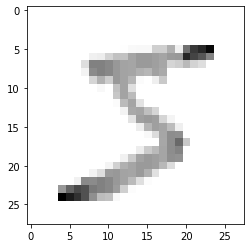

In [8]:
# Image Representation of Data
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [11]:
# Create Sequential Model
model = keras.models.Sequential()

# Initialize Input Layer (Flatten for Array)
model.add(layers.Flatten())

# Initialize Hidden Layers
model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(128, activation=tf.nn.relu))

# Initalize Output Layer
model.add(layers.Dense(10, activation=tf.nn.softmax))

In [12]:
# Train Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2651 - accuracy: 0.9228
Epoch 2/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1091 - accuracy: 0.9660
Epoch 3/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0728 - accuracy: 0.9773
Epoch 4/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0538 - accuracy: 0.9830


In [17]:
# Get Loss and Accuracy Metrics
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {round(loss * 100, 2)}%')
print(f'Accuracy: {round(accuracy * 100, 2)}%')

313/313 [==============================] - 0s 1ms/step - loss: 0.0975 - accuracy: 0.9697
Loss: 9.75%
Accuracy: 96.97%


(28, 28)


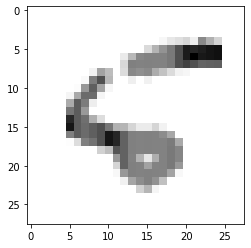

Predicted 5 with 94.86% condifence


In [36]:
# Test with Custom Input
predictions = model.predict([x_test])

# Extract Single Example from Prediction
example_index = 8
example = predictions[example_index]

# Plot Example Image
plt.imshow(x_test[example_index], cmap=plt.cm.binary)
plt.show()

# Evaluate Predicted Value and Confidence
predicted_value = np.argmax(example)
predicted_condifence = max(example)

# Print Findings
print(f'Predicted {predicted_value} with {round(predicted_condifence * 100, 2)}% condifence')

In [19]:
# Save Model
model.save('../digits.model')

INFO:tensorflow:Assets written to: ../digits.model/assets
INFO:tensorflow:Assets written to: ../digits.model/assets
